<a href="https://colab.research.google.com/github/sahilfaizal01/NLP-Resources/blob/main/GloVe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchtext.vocab as vocab
from torchtext.vocab import Vectors

/usr/local/lib/python3.10/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


# **Downloading pre-trained weights**

In [3]:
class newGloVe(Vectors):
    url = {
        "42B": "https://huggingface.co/stanfordnlp/glove/resolve/main/glove.42B.300d.zip",
        "840B": "https://huggingface.co/stanfordnlp/glove/resolve/main/glove.840B.300d.zip",
        "twitter.27B": "https://huggingface.co/stanfordnlp/glove/resolve/main/glove.twitter.27B.zip",
        "6B": "https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip",
    }

    def __init__(self, name="840B", dim=300, **kwargs) -> None:
        url = self.url[name]
        print(f"Downloading from {url}")
        name = "glove.{}.{}d.txt".format(name, str(dim))
        super(newGloVe, self).__init__(name, url=url, **kwargs)

glove = newGloVe(name='6B', dim=100)

.vector_cache/glove.6B.zip: 862MB [00:19, 44.8MB/s]                           
100%|█████████▉| 400000/400001 [00:27<00:00, 14697.33it/s]


In [4]:
# %% number of words and embeddings
glove.vectors.shape

torch.Size([400001, 100])

# **Get Embedding Vector**

In [5]:
#%% get an embedding vector
def get_embedding_vector(word):
    word_index = glove.stoi[word]
    emb = glove.vectors[word_index]
    return emb

get_embedding_vector('chess').shape

torch.Size([100])

# **Finding Closest Words based on Distance**

In [6]:
#%% find closest words from input word
def get_closest_words_from_word(word, max_n=5):
    word_emb = get_embedding_vector(word)
    distances = [(w, torch.dist(word_emb, get_embedding_vector(w)).cpu().item()) for w in glove.itos]
    dist_sort_filt = sorted(distances, key=lambda x: x[1])[:max_n]
    return dist_sort_filt

get_closest_words_from_word('chess')

[('chess', 0.0),
 ('backgammon', 4.379469394683838),
 ('grandmasters', 4.56368350982666),
 ('grandmaster', 4.613785743713379),
 ('scrabble', 4.677640438079834)]

# **Analogy**

In [7]:
#%% find closest words from embedding
def get_closest_words_from_embedding(word_emb, max_n=5):
    distances = [(w, torch.dist(word_emb, get_embedding_vector(w)).cpu().item()) for w in glove.itos]
    dist_sort_filt = sorted(distances, key=lambda x: x[1])[:max_n]
    return dist_sort_filt
# %% find word analogies
# e.g. King is to Queen like Man is to Woman
def get_word_analogy(word1, word2, word3, max_n=5):
    # logic w1= king, ...
    # w2 - w1 + w3 --> w4
    word1_emb = get_embedding_vector(word1)
    word2_emb = get_embedding_vector(word2)
    word3_emb = get_embedding_vector(word3)
    word4_emb = word2_emb - word1_emb + word3_emb
    analogy = get_closest_words_from_embedding(word4_emb)
    return analogy

get_word_analogy(word1='sister', word2='brother', word3='nephew')

[('nephew', 3.9346508979797363),
 ('brother', 4.407793045043945),
 ('grandson', 4.478913307189941),
 ('son', 4.707828521728516),
 ('uncle', 4.8912482261657715)]

# **GloVe Word Cluster**

In [8]:
#%% packages
import pandas as pd
from plotnine import ggplot, aes, geom_text, labs
from sklearn.manifold import TSNE
import torchtext.vocab as vocab
import torch

In [9]:
#%% import GloVe
glove_dim = 100
glove = vocab.GloVe(name='6B', dim = glove_dim)

In [10]:
#%% Get closest words from word input
def get_embedding_vector(word):
    word_index = glove.stoi[word]
    emb = glove.vectors[word_index]
    return emb

# Form the dataset

In [11]:
def get_closest_words_from_word(word, max_n=5):
  word_emb = get_embedding_vector(word)
  distances = [(w, torch.dist(word_emb, get_embedding_vector(w)).cpu().item()) for w in glove.itos]
  dist_sort_filt = sorted(distances, key=lambda x: x[1])[:max_n]
  return [item[0] for item in dist_sort_filt]

get_closest_words_from_word(word='chess', max_n=10)

['chess',
 'backgammon',
 'grandmasters',
 'grandmaster',
 'scrabble',
 'billiards',
 'xiangqi',
 'kasparov',
 'snooker',
 'olympiad']

In [12]:
words = []
categories = ['numbers', 'algebra', 'music', 'science', 'technology']

df_word_cloud = pd.DataFrame({
    'category': [],
    'word': []
})

for category in categories:
    print(category)
    closest_words = get_closest_words_from_word(word=category, max_n=20)
    temp = pd.DataFrame({
        'category': [category] * len(closest_words),
        'word': closest_words
    })
    df_word_cloud = pd.concat([df_word_cloud, temp], ignore_index=True)

numbers
algebra
music
science
technology


In [13]:
df_word_cloud

,category,word
0,numbers,numbers
1,numbers,number
2,numbers,though
3,numbers,instance
4,numbers,fact
...,...,...
95,technology,applications
96,technology,innovations
97,technology,developing
98,technology,research


# Get all word embeddings

In [14]:
# %% get the 100 dimension word embedding for all words
n_rows = df_word_cloud.shape[0]
n_cols = glove_dim
X = torch.empty((n_rows, n_cols))
for i in range(n_rows):
    current_word = df_word_cloud.loc[i, 'word']
    X[i, :] = get_embedding_vector(current_word)
    print(f"{i}: {current_word}")

0: numbers
1: number
2: though
3: instance
4: fact
5: indicate
6: moreover
7: comparison
8: figures
9: although
10: indeed
11: example
12: mean
13: proportion
14: same
15: fewer
16: seen
17: indicates
18: given
19: ones
20: algebra
21: algebras
22: geometry
23: heyting
24: homological
25: trigonometry
26: boolean
27: mathematics
28: algebraic
29: generalization
30: calculus
31: associative
32: formula_1
33: multiplication
34: arithmetic
35: commutative
36: isomorphic
37: linear
38: equivalently
39: quaternion
40: music
41: musical
42: dance
43: songs
44: pop
45: recording
46: folk
47: jazz
48: concert
49: musicians
50: contemporary
51: artists
52: soundtrack
53: hop
54: studio
55: song
56: tunes
57: singing
58: band
59: performing
60: science
61: sciences
62: physics
63: mathematics
64: studies
65: institute
66: biology
67: psychology
68: research
69: scientific
70: humanities
71: study
72: economics
73: literature
74: sociology
75: arts
76: chemistry
77: astronomy
78: journalism
79: p

In [15]:
X.shape

torch.Size([100, 100])

# TSNE Dimensional Reduction

In [16]:
# %%
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X.cpu().numpy())

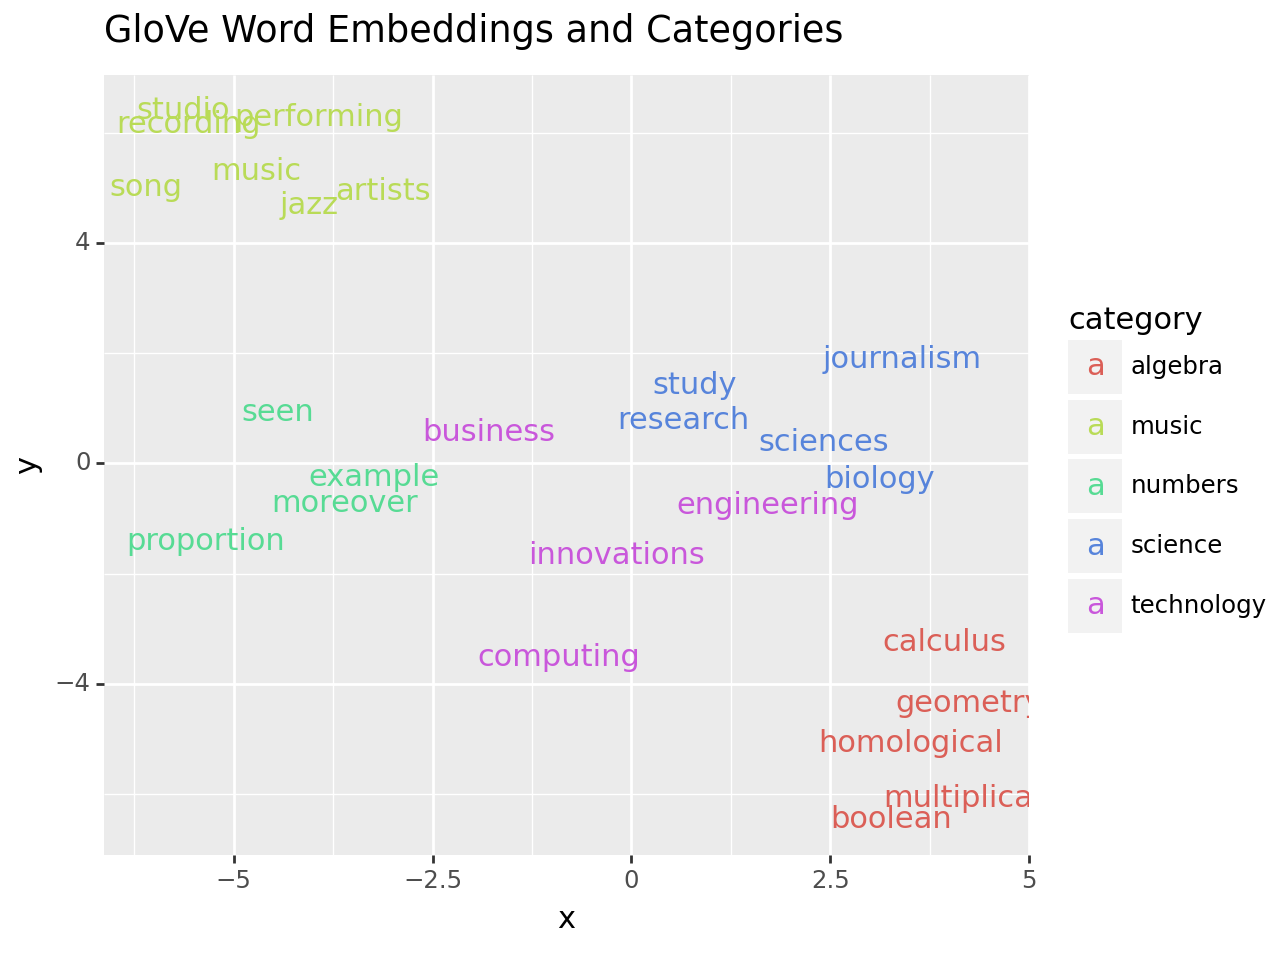

<Figure Size: (640 x 480)>

In [20]:
# %%
df_word_cloud['x'] = X_tsne[:, 0]
df_word_cloud['y'] = X_tsne[:, 1]

ggplot(data=df_word_cloud.sample(25)) + aes(x = 'x', y='y', label = 'word', color = 'category') + geom_text() + labs(title='GloVe Word Embeddings and Categories')